In [1]:
import numpy as np
import cooltools
import cooler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import pandas as pd

In [2]:
##### to plot ticks in terms of megabases we use the EngFormatter
# https://matplotlib.org/gallery/api/engineering_formatter.html
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [3]:
path="../../data/4DNFI9GMP2J8.rebinned.mcool"
resolution=128_000
coolres = "%s::resolutions/%d" % (path, resolution)
clr = cooler.Cooler(coolres)

In [4]:
### to print chromosomes and binsize for this cooler
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

### to make a list of chromosome start/ends in bins:
chromstarts = []
for i in clr.chromnames:
    #print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

chromosomes: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY'], binsize: 128000


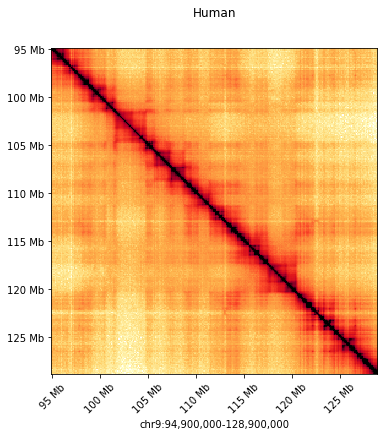

In [6]:
import cooltools.lib.plotting
norm = LogNorm(vmax=10_000)

f, ax = plt.subplots(figsize=(7,6))

start, end = 94_900_000, 128_900_000
region = ('chr9', start, end)
im = ax.matshow(
    clr.matrix(balance=False).fetch(region),
    norm=norm,
    cmap="fall",
    extent=(start, end, end, start)
);
ax.set_title("Human", y=1.08)
ax.set(xlabel=f'chr9:{start:,}-{end:,}')
format_ticks(ax)